# 2. Program Description
My solver is based on the Crank Nicolson method. I chose this method to avoid sensitivity of $\text{d}t$. `myFE1dibvp` is the function that pieces together the components for the ODE problem given by $M\dot{W} + KW = F$. In this function, I call the global mass matrix builder `massM`, the global stiffness matrix builder, `stiffK`, and the global load vector builder, `loadF`. The solver itself is the function `crank_nicolson_solver`. Aside from the components described previously, the function has inputs as follows:

- `u0`: the callable function that represents the initial condition $u_0(x)$
- `xh`: an array that contains the x-nodes that are the endpoints for each subelement in the spatial domain
- `T`: end time for the PDE time domain
- `dt`: the time step for the discretization on the time domain
- `p0`: the constant that represents the Dirichlet boundary condition at the left endpoint
- `QL`: the callable function that represents the Neumann boundary condition at the right endpoint
- `shapeFn`: the value that indicates the degree of the shape function to be used in the FEM portion of the problem

`crank_nicolson_solver` starts with a function that can make uh a callable function array so that it can store the numerical solutions to the PDE in an element of the array. I also have a section that reconstructs global node coordinates because without it `Wn`, the numerical solution at the nth step assumes a conflicting dimension. Following this construct the Crank Nicolson matrices and store the initial condition in the first element of uh. From there we recursively solve the the next time step by applying the method and solving using scipy solvers. 


md_text = """
# Heading 1
## Heading 2
- List item 1
- List item 2
"""

with open("example.md", "w") as file:
    file.write(md_text)


# 4. True solution vs numerical solution for $t = 1$
## Linear shape functions:
I was unable to resolve my issues with the use of linear shape functions in my solver. 

## Quadratic shape functions:
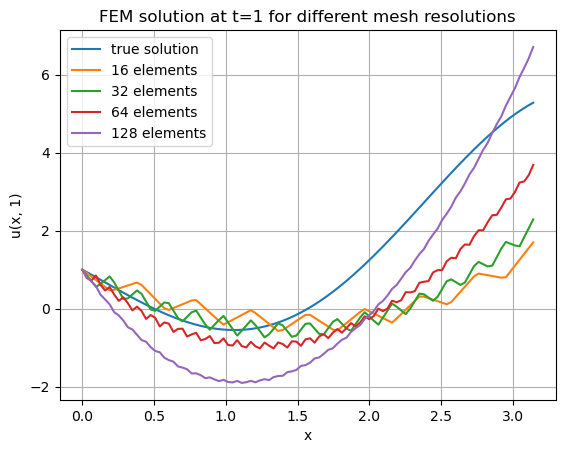
From the figure above it is interesting to note that that as the mesh refined, the numerical solution appears to take a shape that is more and more similar to the true solution. However, the refined mesh also produces a much larger difference between the true solution and the numerical solution at lower values of $x$, particularly around $x=1$. I would still pick the more refined mesh to produce a more "accurate" approximation given the improved plot shape and tighter fit at larger values of x. 

# 5. Absolute differences between true and numerical solutions at $x$ for $t=1$

## Linear shape functions:

## Quadratic shape functions:
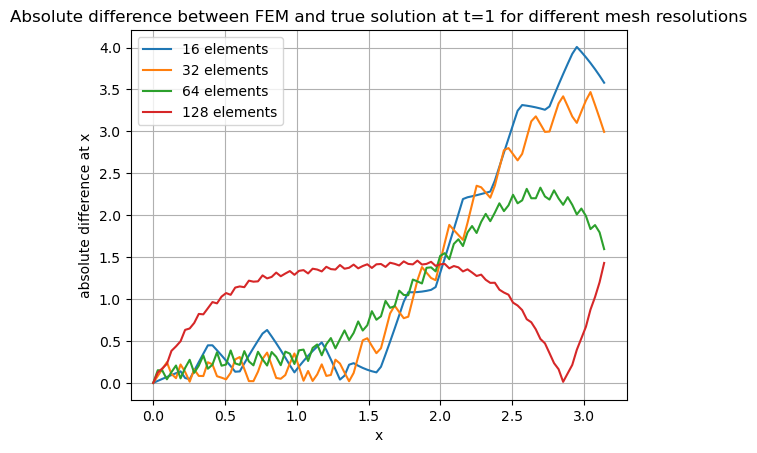
The plot above proves exactly what I suspected from the section above. In particular, it is evident that as the mesh is refined, up to 128 elements, absolute error does decrease overall but that improved approximation is best observed for larger values of $x$. More specifically, for $x>2$ the mesh of 128 elements produces a significantly improved approximation but for $x<2$ it is actually the worst approximation, with the greatest discreapancy located around $x=1$. 

# 6. Absolute differences between true and numerical solutions $\forall t \in [0,1]$

## Linear shape functions:
I was unable to resolve my issues with the use of linear shape functions in my solver. 

## Quadratic shape functions:
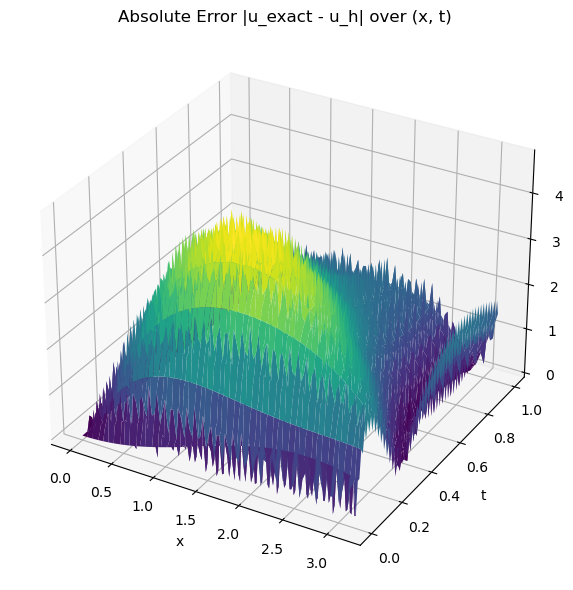
Here I present the evolution of the absolute error when the mesh size for the spatial domain is 128 elements. It is evident that there is a definite spike in error as x and t increase but they appear to be bounded and decrease as the time and spatial elements reach their respective extrema. With maximum error being observed in the vicinity of $x\approx 1$ and $t \approx 0.4$

# 7. Convergence
The convergence of the Crank Nicolson method in theory is dependent on the time discretization and the spatial discretization. In space we get an error of order $\mathrm{O}(h^k)$ and $\mathrm{O}(\Delta t^2)$ in time. Since our shape functions are quadratic for the implementation i was able to execute, $k=3$ thus the rate of convergence of the Crank Nicolson method is $\mathrm{O}(h^3)$. The convergence after computation can be found by using the absolute errors as follows:

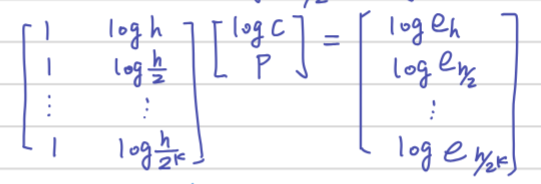
For time $t=1$ this produced a order of -5.456 which is surprising because this is significantly different fromthe expected value. Thus I believe the implementation is faulty when computing Wn and this is reflected in my inability to reconcile the use of linear and quadratic shape functions. All this is evident in caluclation in my python function file. 